# Price prediction From Home Sales Dataset
## Intro
#### In this task, "House Price" dataset is checked. Various regression models have been implemented and then best of the best and the worst of the worst models is determined.<br><br>In the second phase, a code is written that the user can use to find the desired house

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## data preview

In [271]:
df = pd.read_csv("kc_house_data.csv")

In [272]:
df.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
5    101930     1.0           0     0  ...     11        3890           1530   
6      6819     2.0           0     0  ...      7        1715              0   
7      9711     1.0           0     0  ...      7        1060              0   
8      7470     1.0           0     0  ...      7        1050            730   
9      6560     2.0           0     0  ...      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570  

[10 rows x 21 columns]

In [273]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### isNull ?!

#### it is checked whether the data of this dataset is null or not:

In [274]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### It can be seen that there is no empty data in this dataset.

## data analysis

#### In the graph below, it can be seen that most of the houses were sold at lower prices:

<AxesSubplot: xlabel='price', ylabel='Count'>

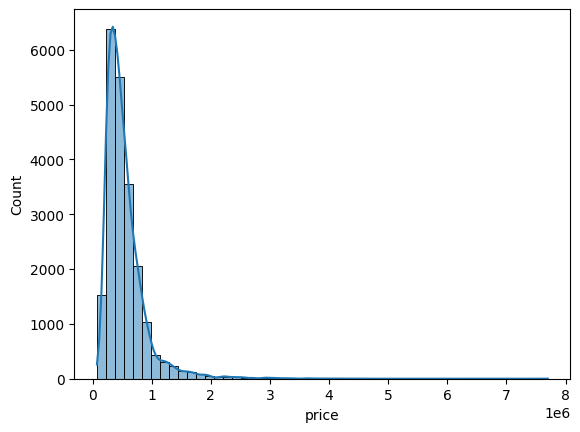

In [275]:
sns.histplot(data=df,x='price' , bins=50, kde=True)

#### sqft_living and price have a direct relationship and with the increase of sqft_living, price also increases:

Text(0, 0.5, 'price')

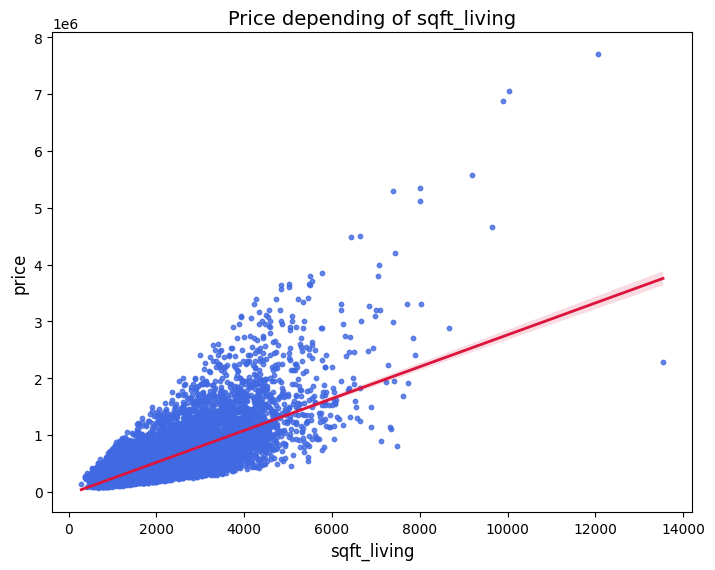

In [276]:
figure = plt.figure()
axes = figure.add_axes([0, 0, 1, 1]) 
sns.regplot(x='sqft_living', y='price', data=df, color='royalblue', ax=axes, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 2})
axes.set_title('Price depending of sqft_living', fontsize=14)
axes.set_xlabel('sqft_living', fontsize=12)
axes.set_ylabel('price', fontsize=12)

#### In this diagram and the shape of the city map obtained, it is clear that some houses by the river are more expensive:

<AxesSubplot: xlabel='long', ylabel='lat'>

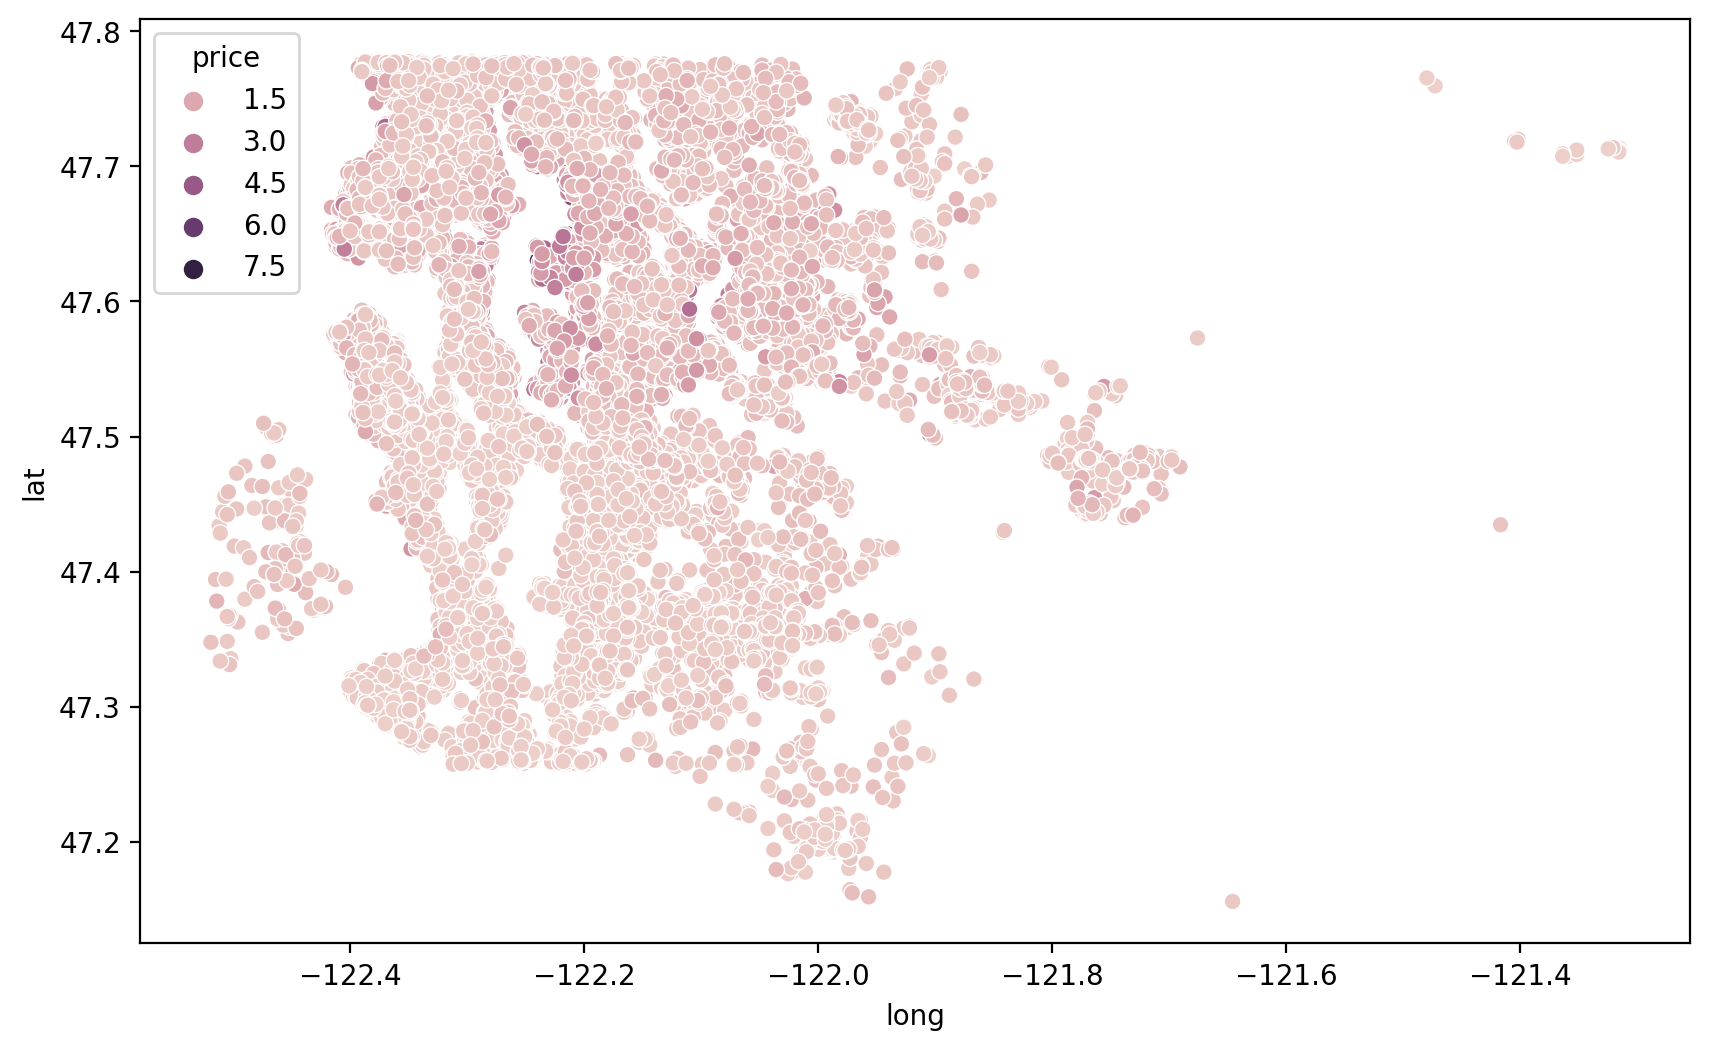

In [277]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, x='long',y='lat', hue='price')

### Checking Correlations between data:

In [278]:
corrdf = df.corr(numeric_only=True)

<AxesSubplot: >

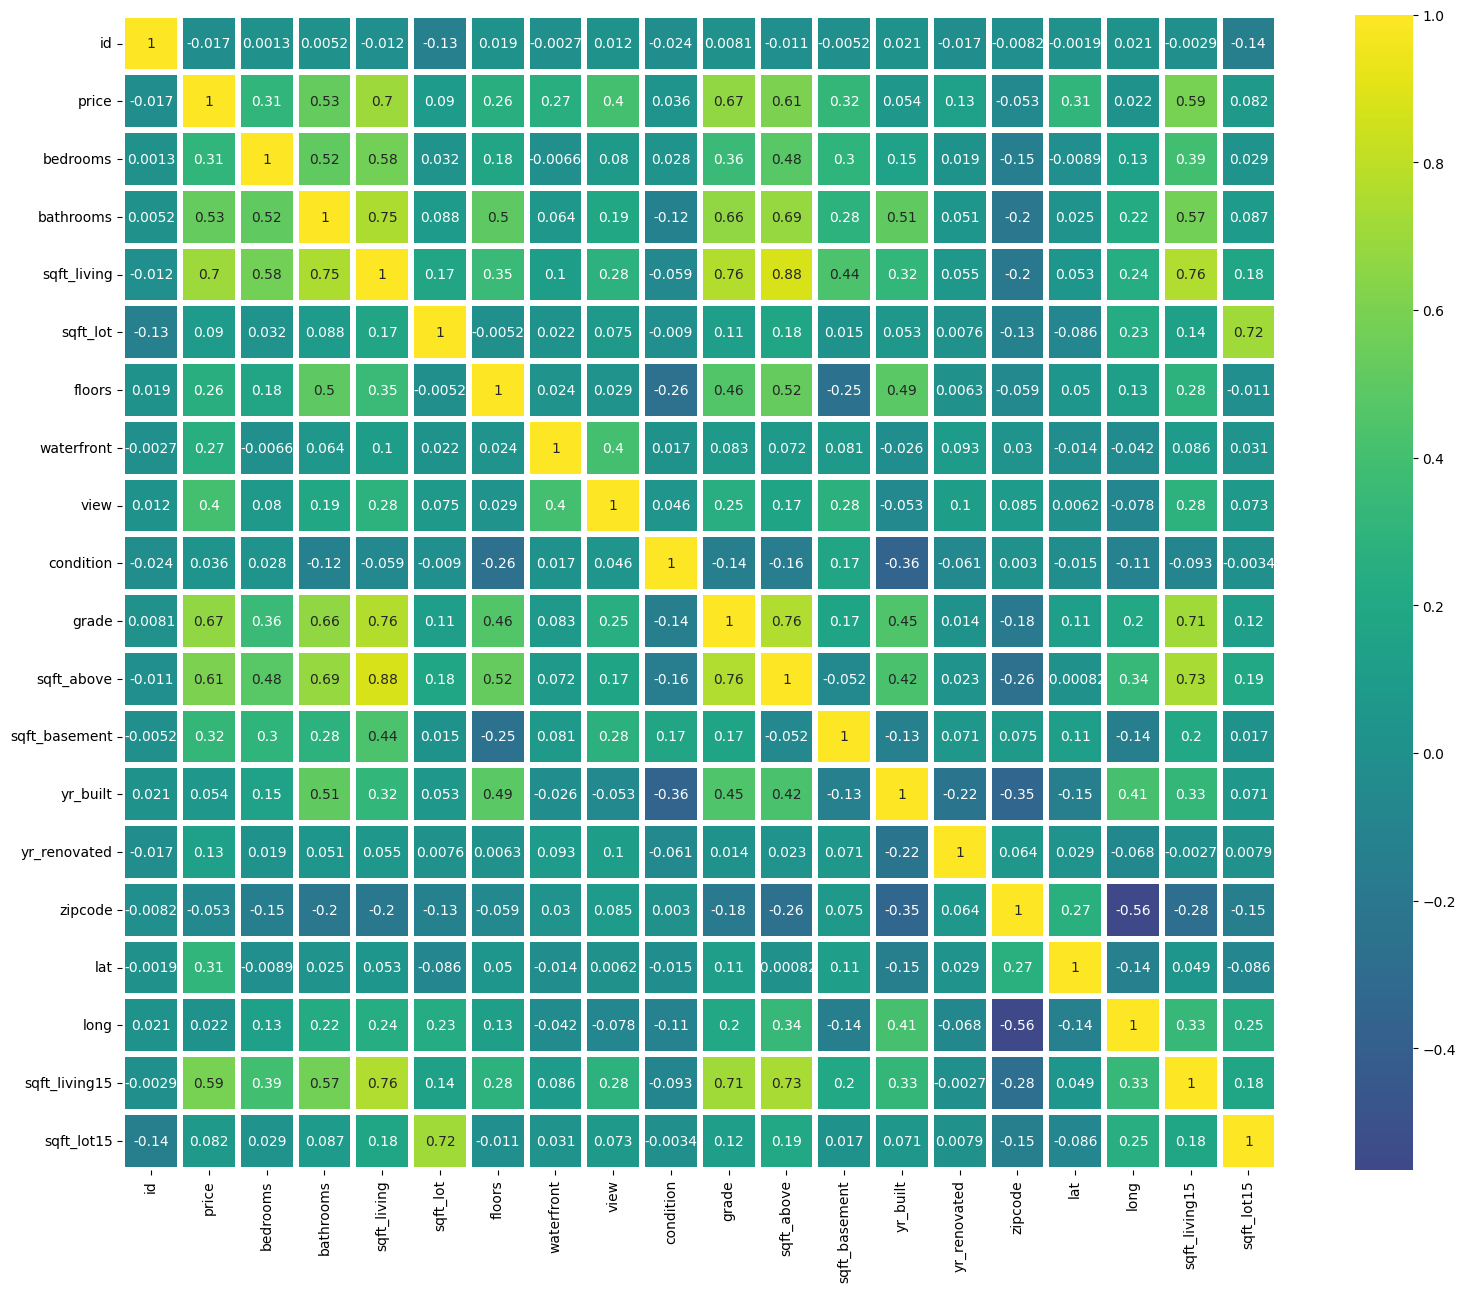

In [279]:
plt.figure(figsize=(20,15))
sns.heatmap(corrdf, annot=True, square=True, center= 0, cmap='viridis', linewidths=3) 

#### Through this heatmap, it is clear that 'id' and 'zipcode' have nothing to do with the price! Therefore, they are excluded from the database:

In [280]:
corrdf.sort_values(by=['price'], ascending=False)['price']

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [281]:
df = df.drop(['id','zipcode'], axis=1)

In [282]:
df.head(5)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   
3  20141209T000000  604000.0         4       3.00         1960      5000   
4  20150218T000000  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     2.0           0     0          3      7        2170            400   
2     1.0           0     0          3      6         770              0   
3     1.0           0     0          5      7        1050            910   
4     1.0           0     0          3      8        1680              0   

   yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  
0      1955             0  47.5112 -122.257           1340        5650  
1      1951          1991  47.7210 -122.319           1690        7639  
2      1933             0  47.7379 -122.233           2720        8062  
3      1965             0  47.5208 -122.393           1360        5000  
4      1987             0  47.6168 -122.045           1800        7503

### if price depends on date(years and month)?

In [283]:
df['date'] = pd.to_datetime(df['date'])

In [284]:
df['year'] = df['date'].dt.year

In [285]:
df['month'] = df['date'].dt.month

In [286]:
df.head(5)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated      lat     long  sqft_living15  sqft_lot15  year  month  
0             0  47.5112 -122.257           1340        5650  2014     10  
1          1991  47.7210 -122.319           1690        7639  2014     12  
2             0  47.7379 -122.233           2720        8062  2015      2  
3             0  47.5208 -122.393           1360        5000  2014     12  
4             0  47.6168 -122.045           1800        7503  2015      2  

[5 rows x 21 columns]

<AxesSubplot: xlabel='month', ylabel='price'>

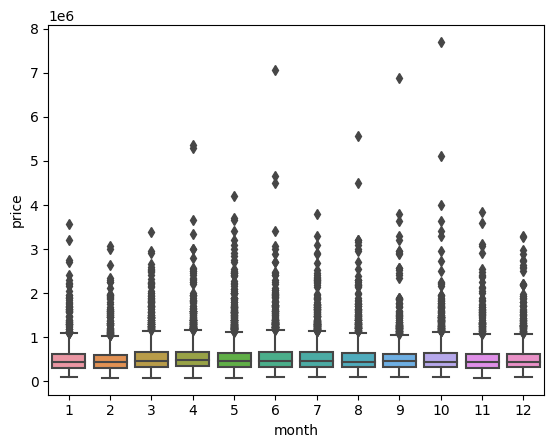

In [287]:
sns.boxplot(df, x='month', y='price')

<AxesSubplot: xlabel='year', ylabel='price'>

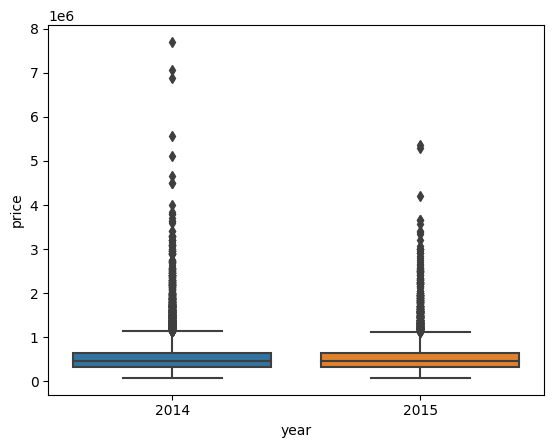

In [288]:
sns.boxplot(df, x='year', y='price')

In [289]:
newHomes = df[df['year'] >= 2015]

In [290]:
oldHomes = df[df['year'] < 2015]

<AxesSubplot: xlabel='price', ylabel='Count'>

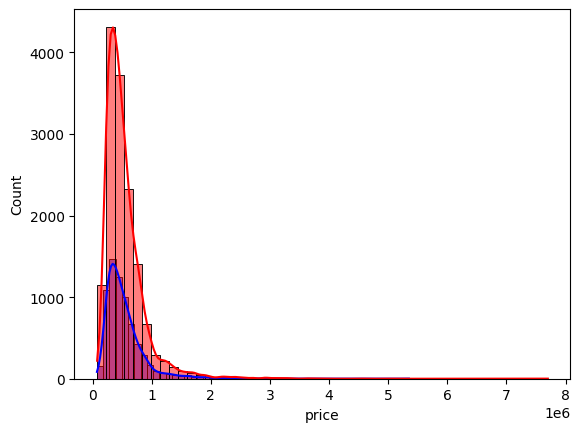

In [291]:
sns.histplot(data=newHomes ,x='price' , bins=50, kde=True, color='blue')
sns.histplot(data=oldHomes ,x='price' , bins=50, kde=True, color='red')

<AxesSubplot: xlabel='date', ylabel='price'>

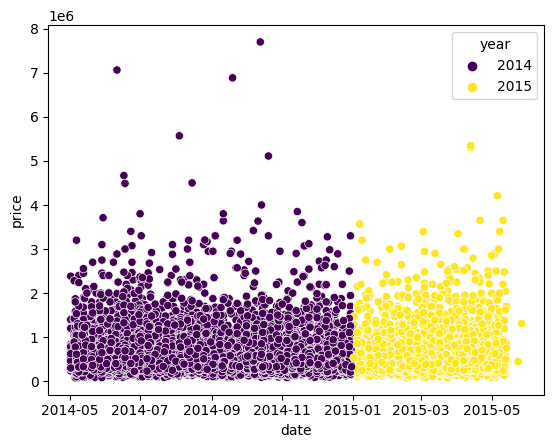

In [292]:
sns.scatterplot(data=df ,x='date' , y='price', hue='year', palette='viridis')

#### From the graphs above, it can be concluded that the day, month and year have no effect on the price. Therefore, these will also be excluded from our data:

In [293]:
data = df.drop(['date','year', 'month'], axis=1)

In [294]:
data.head(5)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  
0  47.5112 -122.257           1340        5650  
1  47.7210 -122.319           1690        7639  
2  47.7379 -122.233           2720        8062  
3  47.5208 -122.393           1360        5000  
4  47.6168 -122.045           1800        7503

### Checking Data and finding outliers

<AxesSubplot: xlabel='price', ylabel='Count'>

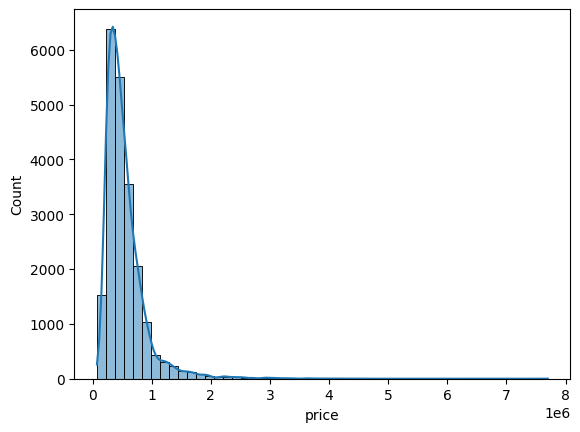

In [295]:
sns.histplot(data=data,x='price' , bins=50, kde=True)

In [296]:
data = data[data['price'] < 1500000]

<AxesSubplot: xlabel='price', ylabel='Count'>

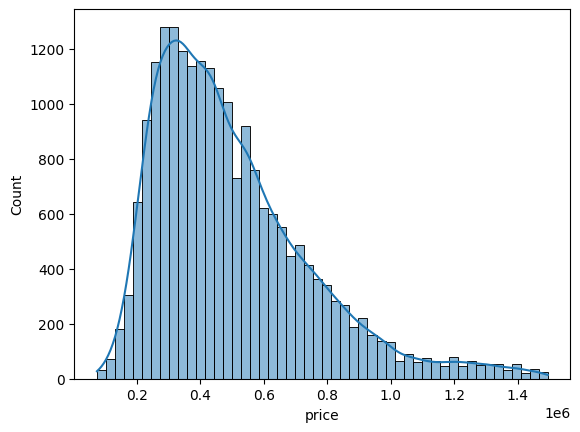

In [297]:
sns.histplot(data=data,x='price' , bins=50, kde=True)

<AxesSubplot: xlabel='long', ylabel='lat'>

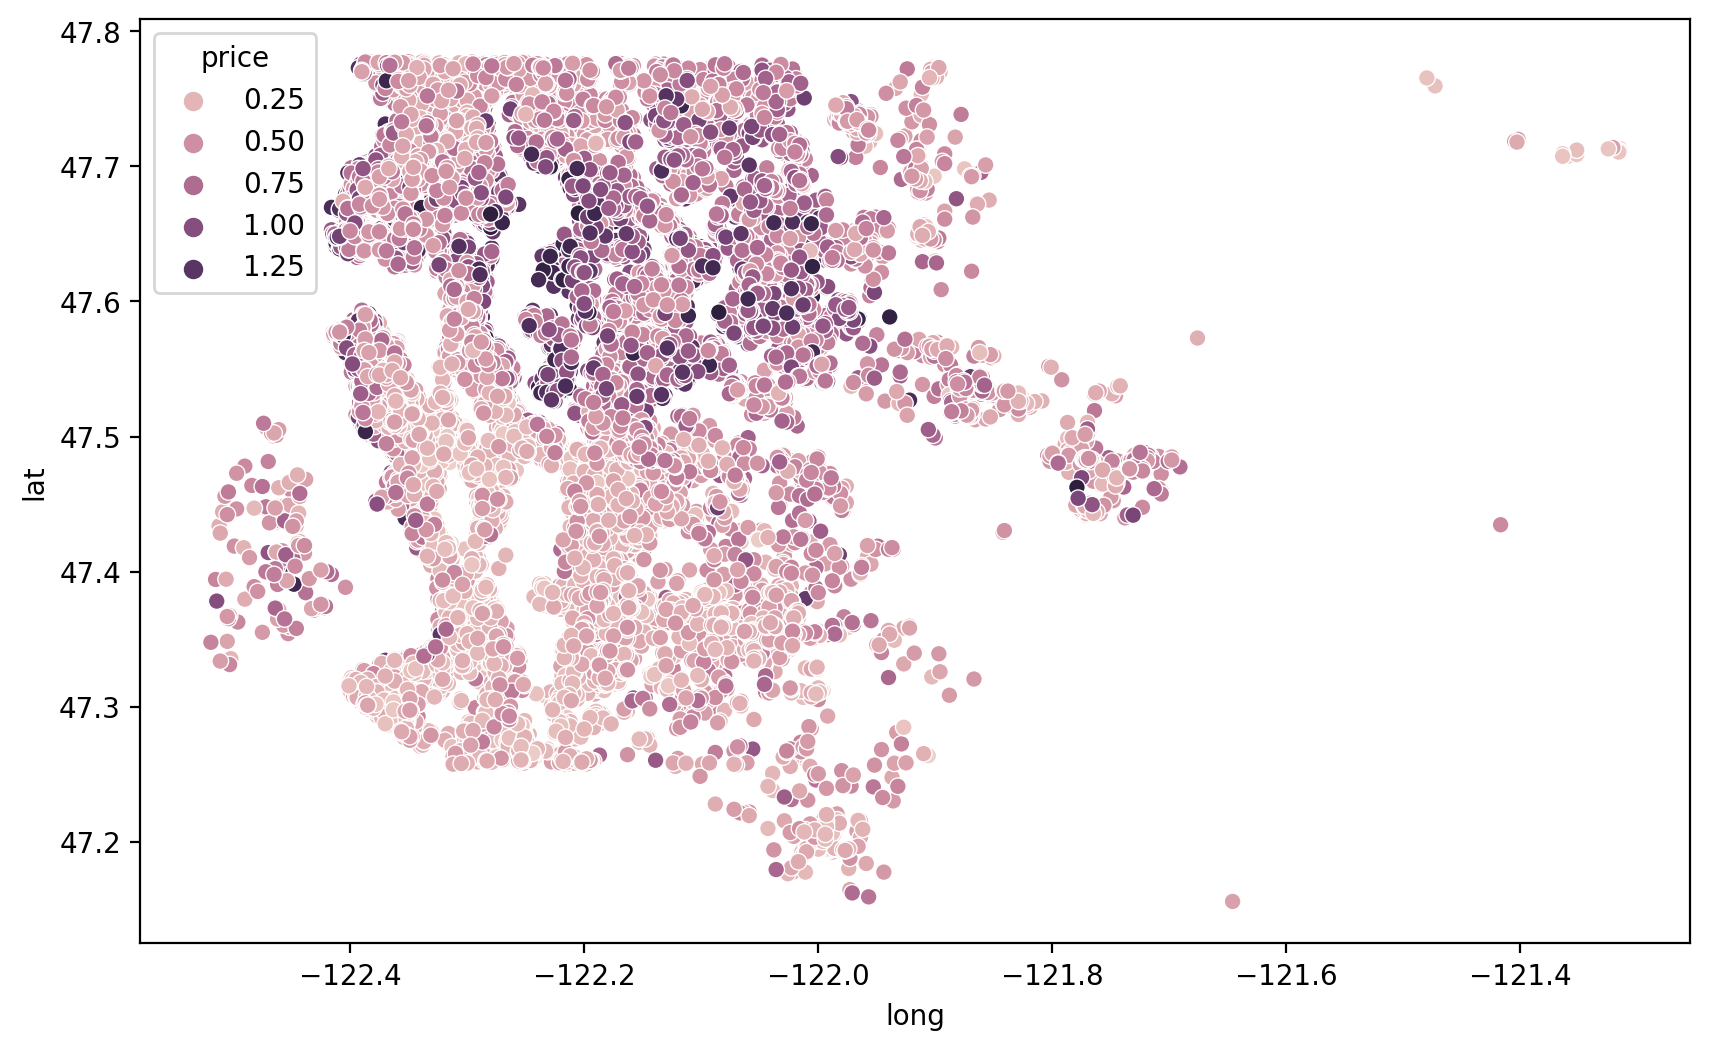

In [298]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=data, x='long',y='lat', hue='price')

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

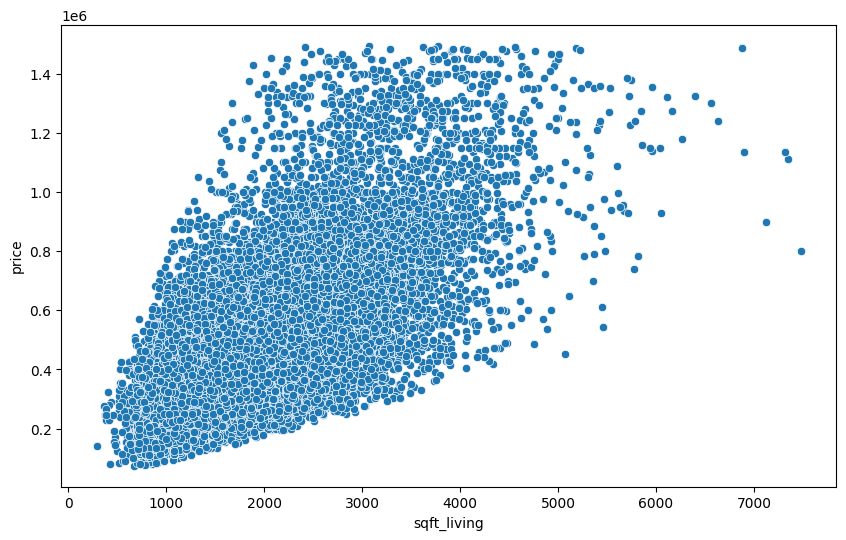

In [299]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(x='sqft_living',y='price',data=data)

In [300]:
data = data[data['sqft_living'] < 6200]

<AxesSubplot: xlabel='sqft_basement', ylabel='price'>

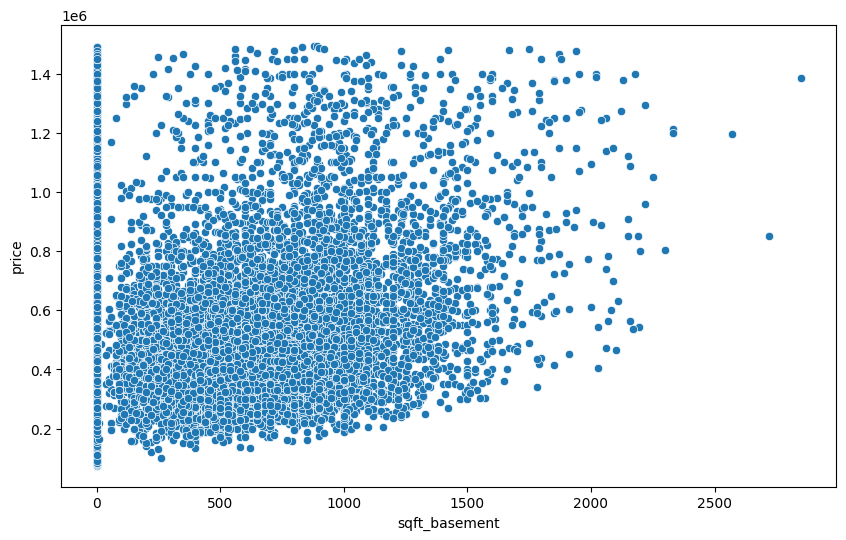

In [301]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(x='sqft_basement',y='price',data=data)

In [302]:
data = data[data['sqft_basement'] < 2300]

<AxesSubplot: xlabel='sqft_lot', ylabel='price'>

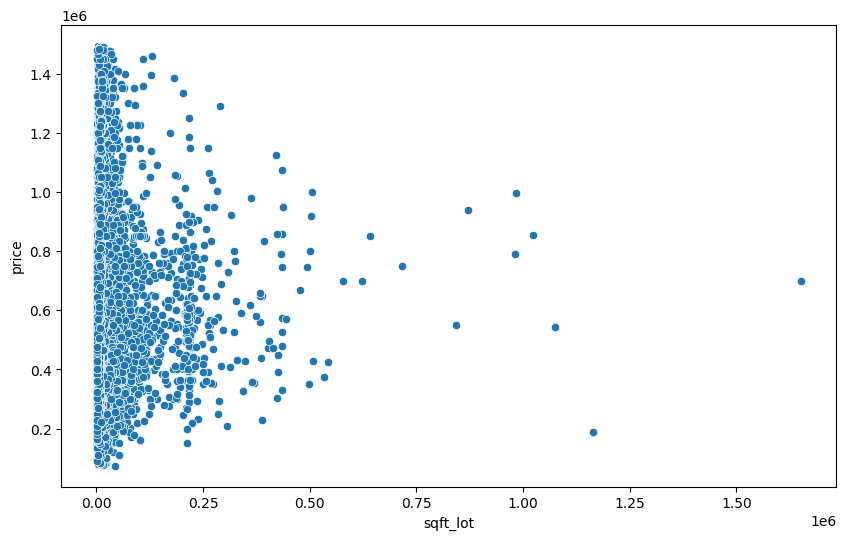

In [303]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(x='sqft_lot',y='price',data=data)

In [304]:
data = data[data['sqft_lot'] < 600000]

<AxesSubplot: xlabel='sqft_lot15', ylabel='price'>

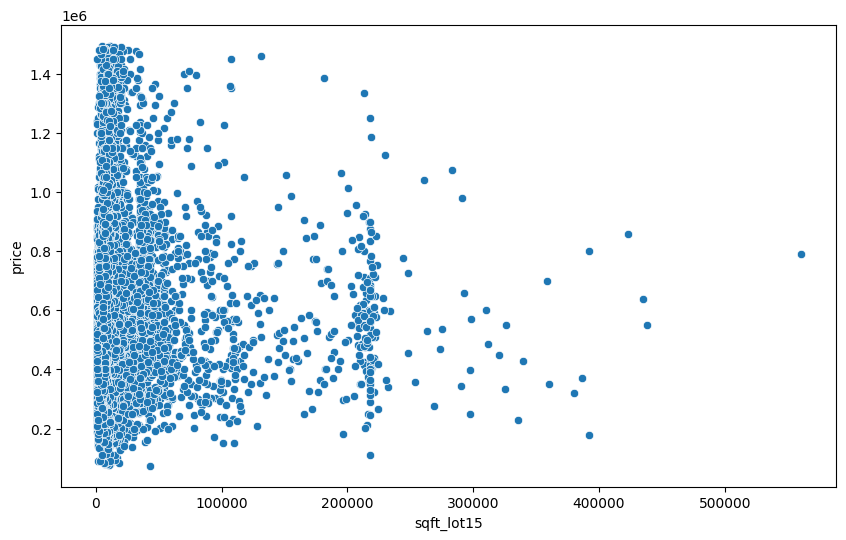

In [305]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(x='sqft_lot15',y='price',data=data)

In [306]:
data = data[data['sqft_lot15'] < 280000]

<AxesSubplot: xlabel='sqft_living15', ylabel='price'>

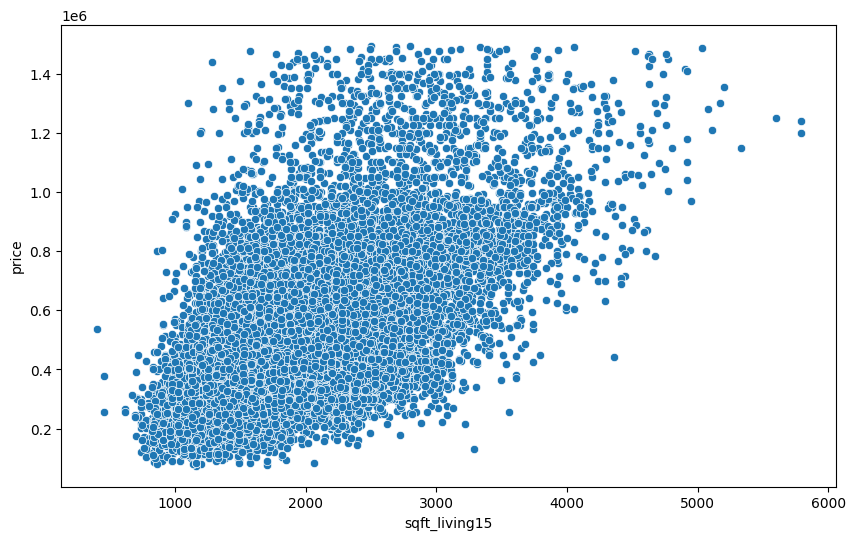

In [307]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(x='sqft_living15',y='price',data=data)

In [308]:
data = data[data['sqft_living15'] < 5000]

plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(x='sqft_above' ,y='price',data=data)

In [309]:
data = data[data['sqft_above'] < 5800]

### Checking Correlations again after removing deleting the extra data

In [310]:
corrdata = data.corr(numeric_only=True)

<AxesSubplot: >

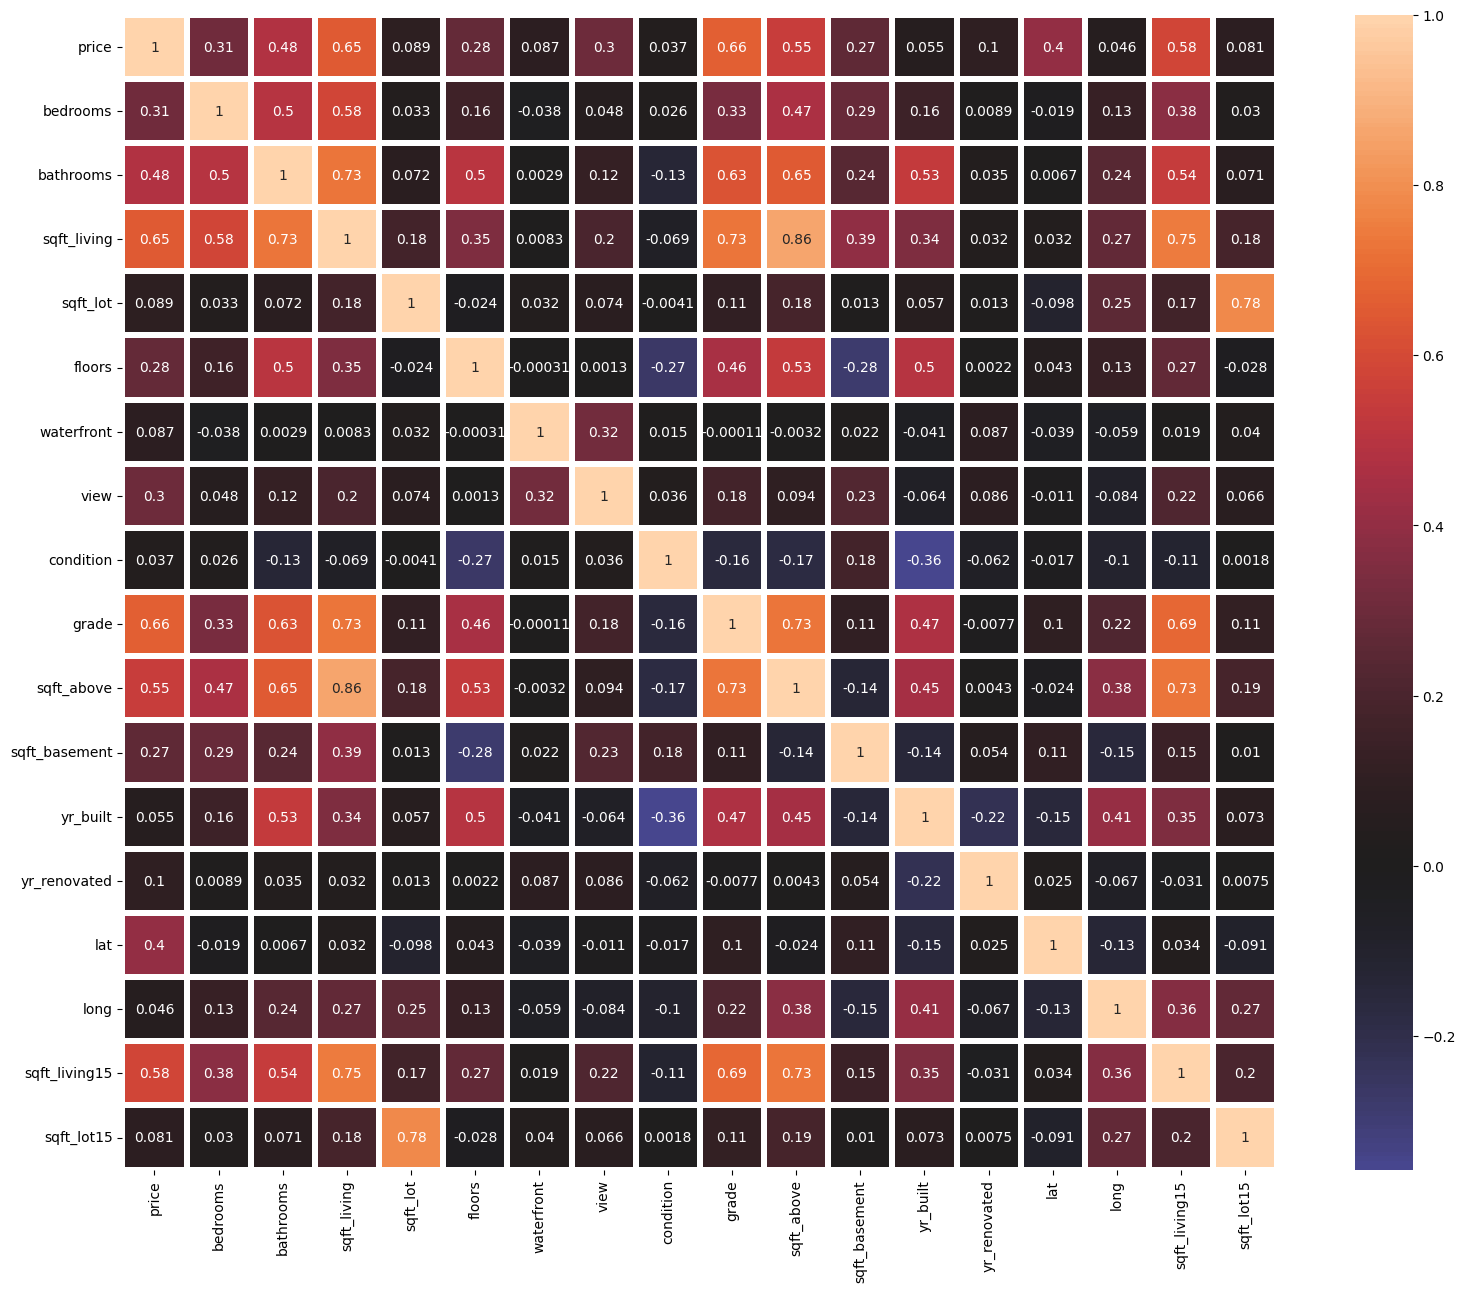

In [311]:
plt.figure(figsize=(20,15))
sns.heatmap(corrdata, annot=True, square=True, center= 0, linewidths=3) 

In [312]:
data = data.drop(['sqft_lot15', 'long', 'lat', 'yr_renovated', 'yr_built', 'sqft_basement',
                  'condition', 'view', 'waterfront', 'floors', 'sqft_lot', 'bedrooms', 'bathrooms'], axis=1)

In [313]:
data.head(5)

price  sqft_living  grade  sqft_above  sqft_living15
0  221900.0         1180      7        1180           1340
1  538000.0         2570      7        2170           1690
2  180000.0          770      6         770           2720
3  604000.0         1960      7        1050           1360
4  510000.0         1680      8        1680           1800

### Price histogramPlot after removing outliers

<AxesSubplot: xlabel='price', ylabel='Count'>

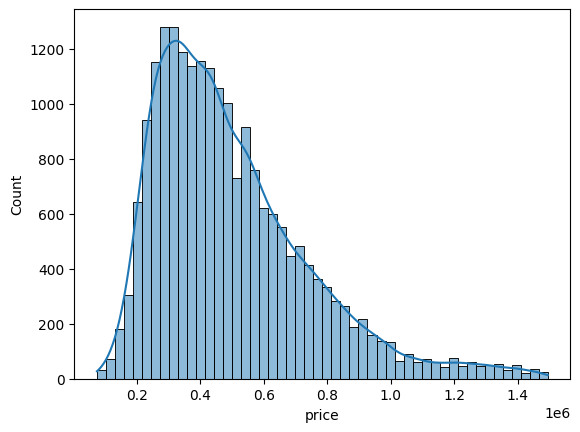

In [314]:
sns.histplot(data=data,x='price' , bins=50, kde=True)

## Regression Models

In [315]:
X = data.drop('price',axis=1)
y = data['price']

### Linear Regression

In [316]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [318]:
model = LinearRegression(fit_intercept=True)

In [319]:
model.fit(X_train,y_train)

LinearRegression()

#### Linear Reg : Test

In [320]:
test_predictions = model.predict(X_test)

In [321]:
Linear_MAE_test = mean_absolute_error(y_test,test_predictions)
Linear_MSE_test = mean_squared_error(y_test,test_predictions)
Linear_RMSE_test = np.sqrt(Linear_MSE_test)

In [322]:
data['price'].std()/Linear_RMSE_test

1.4557905790149965

In [323]:
Linear_MAE_test

128966.73302305452

In [324]:
Linear_MSE_test

28435883856.620018

In [325]:
Linear_RMSE_test

168629.42761161237

In [326]:
Linear_r2_test = r2_score(y_test,test_predictions)

In [327]:
Linear_r2_test

0.5235307031181615

#### Linear Reg : train 

In [328]:
train_predictions = model.predict(X_train)

In [329]:
Linear_MAE_train = mean_absolute_error(y_train,train_predictions)
Linear_MSE_train = mean_squared_error(y_train,train_predictions)
Linear_RMSE_train = np.sqrt(Linear_MSE_train)

In [330]:
data['price'].std()/Linear_RMSE_train

1.4255774028208423

In [331]:
Linear_MAE_train

130308.07487384537

In [332]:
Linear_RMSE_train

172203.29922171764

In [333]:
Linear_r2_train = r2_score(y_train,train_predictions)

In [334]:
Linear_r2_train

0.5099329617455561

### Linear reg for all data

In [335]:
df['year'] = df['date'].dt.year

In [336]:
df['month'] = df['date'].dt.month

In [337]:
df['day'] = df['date'].dt.day

In [338]:
X = df.drop(['price', 'date'],axis=1)
y = df['price']

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Linear Reg for test of All data (with outliers)

In [340]:
model = LinearRegression(fit_intercept=True)

In [341]:
model.fit(X_train,y_train)

LinearRegression()

In [342]:
test_predictions = model.predict(X_test)

In [343]:
LinearAll_MAE_test = mean_absolute_error(y_test,test_predictions)
LinearAll_MSE_test = mean_squared_error(y_test,test_predictions)
LinearAll_RMSE_test = np.sqrt(LinearAll_MSE_test)

In [344]:
df['price'].std()/LinearAll_RMSE_test

1.804550274345377

In [345]:
LinearAll_MAE_test

125942.71480538946

In [346]:
LinearAll_MSE_test

41389973080.37215

In [347]:
LinearAll_RMSE_test

203445.25819092503

In [348]:
LinearAll_r2_test = r2_score(y_test,test_predictions)

In [349]:
LinearAll_r2_test

0.7049367168571696

#### Linear Reg for train of All data (with outliers)

In [350]:
train_predictions = model.predict(X_train)

In [351]:
LinearAll_MAE_train = mean_absolute_error(y_train,train_predictions)
LinearAll_MSE_train = mean_squared_error(y_train,train_predictions)
LinearAll_RMSE_train = np.sqrt(LinearAll_MSE_train)

In [352]:
df['price'].std()/LinearAll_RMSE_train

1.8211430395976702

In [353]:
LinearAll_MAE_train

125466.14585805403

In [354]:
LinearAll_MSE_train

40639185876.51591

In [355]:
LinearAll_RMSE_train

201591.63146449285

In [356]:
LinearAll_r2_train = r2_score(y_train,train_predictions)

In [357]:
LinearAll_r2_train

0.693101158009862

### Ridge Regression

In [358]:
X = data.drop('price',axis=1)
y = data['price']

In [359]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [360]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [361]:
poly_features = polynomial_converter.fit_transform(X)

In [362]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [363]:
scaler = StandardScaler()

In [364]:
scaler.fit(X_train)

StandardScaler()

In [365]:
X_train = scaler.transform(X_train)

In [366]:
X_test = scaler.transform(X_test)

In [367]:
ridge_model = Ridge(alpha=10)

In [368]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

#### Ridge Reg: Test Metrics

In [369]:
test_predictions = ridge_model.predict(X_test)

In [370]:
Ridge_MAE_test = mean_absolute_error(y_test,test_predictions)
Ridge_MSE_test = mean_squared_error(y_test,test_predictions)
Ridge_RMSE_test = np.sqrt(Ridge_MSE_test)

In [371]:
data['price'].std()/Ridge_RMSE_test

1.4974034504704994

In [372]:
Ridge_MAE_test

125195.01376292766

In [373]:
Ridge_RMSE_test

163943.21248861917

In [374]:
Ridge_r2_test = r2_score(y_test,test_predictions)

In [375]:
Ridge_r2_test

0.5496449152700471

#### Ridge Reg: Train Metrics

In [376]:
train_predictions = ridge_model.predict(X_train)

In [377]:
Ridge_MAE_train = mean_absolute_error(y_train,train_predictions)
Ridge_MSE_train = mean_squared_error(y_train,train_predictions)
Ridge_RMSE_train = np.sqrt(Ridge_MSE_train)

In [378]:
data['price'].std()/Ridge_RMSE_train

1.4661613117948136

In [379]:
Ridge_MAE_train

126916.41721581949

In [380]:
Ridge_MSE_train

28035030314.04932

In [381]:
Ridge_RMSE_train

167436.64567247315

In [382]:
Ridge_r2_train = r2_score(y_train,train_predictions)

In [383]:
Ridge_r2_train

0.5366879587546465

### RidgeCV Regression

In [384]:
from sklearn.linear_model import RidgeCV

In [385]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [386]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [387]:
ridge_cv_model.alpha_

0.1

#### RidgeCV Reg: Test Metrics

In [388]:
test_predictions = ridge_cv_model.predict(X_test)

In [389]:
RidgeCV_MAE_test = mean_absolute_error(y_test,test_predictions)
RidgeCV_MSE_test = mean_squared_error(y_test,test_predictions)
RidgeCV_RMSE_test = np.sqrt(RidgeCV_MSE_test)

In [390]:
data['price'].std()/RidgeCV_RMSE_test

1.5019017210671322

In [391]:
RidgeCV_MAE_test

124803.68333899585

In [392]:
RidgeCV_RMSE_test

163452.19438676155

In [393]:
RidgeCV_r2_test = r2_score(y_test,test_predictions)

In [394]:
RidgeCV_r2_test

0.552338547340326

#### Ridge Reg: Train Metrics

In [395]:
train_predictions = ridge_cv_model.predict(X_train)
RidgeCV_MAE_train = mean_absolute_error(y_train,train_predictions)
RidgeCV_MSE_train = mean_squared_error(y_train,train_predictions)
RidgeCV_RMSE_train = np.sqrt(RidgeCV_MSE_train)

In [396]:
data['price'].std()/RidgeCV_RMSE_train

1.4731955324426995

In [397]:
RidgeCV_MAE_train

126496.885488728

In [398]:
RidgeCV_RMSE_train

166637.16842436529

In [399]:
RidgeCV_r2_train = r2_score(y_train,train_predictions)

In [400]:
RidgeCV_r2_train

0.5411018446482831

### Lasso Regression

In [401]:
from sklearn.linear_model import LassoCV

In [402]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [403]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [404]:
lasso_cv_model.alpha_

17205.290632084223

#### Lassso Reg: Test Metrics

In [405]:
test_predictions = lasso_cv_model.predict(X_test)

In [406]:
Lasso_MAE_test = mean_absolute_error(y_test,test_predictions)
Lasso_MSE_test = mean_squared_error(y_test,test_predictions)
Lasso_RMSE_test = np.sqrt(Lasso_MSE_test)

In [407]:
data['price'].std()/Lasso_MAE_test

1.8773014894978106

In [408]:
Lasso_MAE_test

130767.02566690363

In [409]:
Lasso_RMSE_test

170863.440178332

In [410]:
Lasso_r2_test = r2_score(y_test,test_predictions)

In [411]:
Lasso_r2_test

0.5108224909954769

#### Lassso Reg: Train Metrics

In [412]:
train_predictions = lasso_cv_model.predict(X_train)
Lasso_MAE_train = mean_absolute_error(y_train,train_predictions)
Lasso_MSE_train = mean_squared_error(y_train,train_predictions)
Lasso_RMSE_train = np.sqrt(Lasso_MSE_train)

In [413]:
data['price'].std()/Lasso_MAE_train

1.8626813443036425

In [414]:
Lasso_MAE_train

131793.41319567032

In [415]:
Lasso_MSE_train

30268349644.94184

In [416]:
Lasso_RMSE_train

173978.01483216733

In [417]:
Lasso_r2_train = r2_score(y_train,train_predictions)

In [418]:
Lasso_r2_train

0.4997797148056473

### Elastic Regression

In [419]:
from sklearn.linear_model import ElasticNetCV

In [420]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [421]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [422]:
elastic_model.l1_ratio_

1.0

#### Elastic Reg: Test Metrics

In [423]:
test_predictions = elastic_model.predict(X_test)

In [424]:
Elastic_MAE_test = mean_absolute_error(y_test,test_predictions)
Elastic_MSE_test = mean_squared_error(y_test,test_predictions)
Elastic_RMSE_test = np.sqrt(Elastic_MSE_test)

In [425]:
data['price'].std()/Elastic_RMSE_test

1.4909968177887396

In [426]:
Elastic_MAE_test

125707.45008544577

In [427]:
Elastic_RMSE_test

164647.6566098615

In [428]:
Elastic_r2_test = r2_score(y_test,test_predictions)

In [429]:
Elastic_r2_test

0.5457663578174682

#### Elastic Reg: Train Metrics

In [430]:
train_predictions = elastic_model.predict(X_train)
Elastic_MAE_train = mean_absolute_error(y_train,train_predictions)
Elastic_MSE_train = mean_squared_error(y_train,train_predictions)
Elastic_RMSE_train = np.sqrt(Elastic_MSE_train)

In [431]:
data['price'].std()/Elastic_RMSE_train

1.460636795606273

In [432]:
Elastic_MAE_train

127296.2979133095

In [433]:
Elastic_MSE_train

28247503227.075657

In [434]:
Elastic_RMSE_train

168069.93552410157

In [435]:
Elastic_r2_train = r2_score(y_train,train_predictions)

In [436]:
Elastic_r2_train

0.5331765925124546

### Polynomial Regression

In [437]:
from sklearn.preprocessing import PolynomialFeatures

In [438]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [439]:
poly_features = polynomial_converter.fit_transform(X)

In [440]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [441]:
model = LinearRegression(fit_intercept=True)

In [442]:
model.fit(X_train,y_train)

LinearRegression()

#### polynomial Reg: Test Metrics

In [443]:
test_predictions = model.predict(X_test)

In [444]:
polynomial_MAE_test = mean_absolute_error(y_test,test_predictions)
polynomial_MSE_test = mean_squared_error(y_test,test_predictions)
polynomial_RMSE_test = np.sqrt(polynomial_MSE_test)

In [445]:
data['price'].std()/polynomial_RMSE_test

1.5040337531267851

In [446]:
polynomial_MAE_test

124514.32742910429

In [447]:
polynomial_MSE_test

26640929636.350727

In [448]:
polynomial_RMSE_test

163220.4939226405

In [449]:
polynomial_r2_test = r2_score(y_test,test_predictions)

In [450]:
polynomial_r2_test

0.5536068062412123

#### polynomial Reg: Train Metrics

In [451]:
polynomial_MAE_train = mean_absolute_error(y_train,train_predictions)
polynomial_MSE_train = mean_squared_error(y_train,train_predictions)
polynomial_RMSE_train = np.sqrt(polynomial_MSE_train)

In [452]:
polynomial_MAE_train

127296.2979133095

In [453]:
polynomial_MSE_train

28247503227.075657

In [454]:
polynomial_RMSE_train

168069.93552410157

In [455]:
polynomial_r2_train = r2_score(y_train,train_predictions)

In [456]:
polynomial_r2_train

0.5331765925124546

#### Searching for best degree in polynomial Reg

In [457]:
train_rmse_errors = []

test_rmse_errors = []

for d in range(1,10):
    
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    

    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

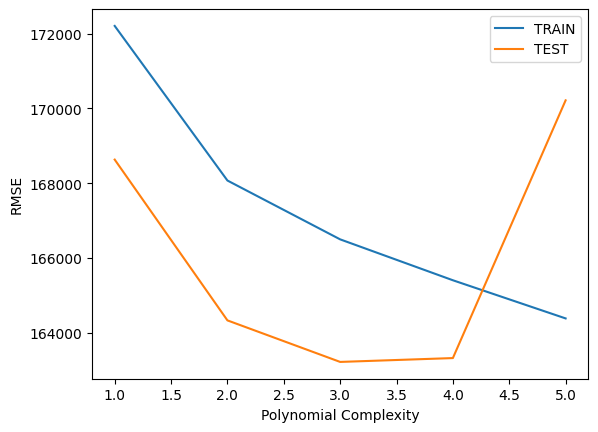

In [458]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

## PCA

In [463]:
D = df.drop(['date'], axis=1)

In [464]:
D.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0     0          3      7  ...              0      1955             0   
1     0          3      7  ...            400      1951          1991   
2     0          3      6  ...              0      1933             0   
3     0          5      7  ...            910      1965             0   
4     0          3      8  ...              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  year  month  day  
0  47.5112 -122.257           1340        5650  2014     10   13  
1  47.7210 -122.319           1690        7639  2014     12    9  
2  47.7379 -122.233           2720        8062  2015      2   25  
3  47.5208 -122.393           1360        5000  2014     12    9  
4  47.6168 -122.045           1800        7503  2015      2   18  

[5 rows x 21 columns]

In [465]:
from sklearn.decomposition import PCA

In [466]:
pca = PCA(n_components=2)

In [467]:
principal_components = pca.fit_transform(D)

In [468]:
pca.n_components

2

In [469]:
pca.components_

array([[ 9.99924589e-01,  7.81122679e-07,  1.10170442e-06,
         1.75662150e-03,  1.02821578e-02,  3.77609407e-07,
         6.27680370e-08,  8.29355271e-07,  6.44150981e-08,
         2.13711784e-06,  1.36631166e-03,  3.90309841e-04,
         4.32824756e-06,  1.38316311e-04,  1.15792986e-07,
         8.44223181e-09,  1.09308754e-03,  6.22698740e-03,
         4.56154542e-09, -8.55315473e-08, -3.44986026e-07],
       [-1.20251471e-02,  7.64751065e-08,  7.21122355e-07,
         2.38371989e-03,  8.69710241e-01, -3.68020203e-07,
         6.57152980e-10,  6.80551990e-07, -1.59735927e-07,
         1.50183218e-06,  2.51603846e-03, -1.32318566e-04,
         3.58217597e-05, -3.29238165e-05, -3.59979242e-07,
         7.57193593e-07,  1.61900189e-03,  4.93401296e-01,
         3.89902142e-08,  1.01067722e-08,  1.95659525e-07]])

In [470]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2'],columns=D.columns)

In [471]:
df_comp

price      bedrooms     bathrooms  sqft_living  sqft_lot  \
PC1  0.999925  7.811227e-07  1.101704e-06     0.001757  0.010282   
PC2 -0.012025  7.647511e-08  7.211224e-07     0.002384  0.869710   

           floors    waterfront          view     condition     grade  ...  \
PC1  3.776094e-07  6.276804e-08  8.293553e-07  6.441510e-08  0.000002  ...   
PC2 -3.680202e-07  6.571530e-10  6.805520e-07 -1.597359e-07  0.000002  ...   

     sqft_basement  yr_built  yr_renovated           lat          long  \
PC1       0.000390  0.000004      0.000138  1.157930e-07  8.442232e-09   
PC2      -0.000132  0.000036     -0.000033 -3.599792e-07  7.571936e-07   

     sqft_living15  sqft_lot15          year         month           day  
PC1       0.001093    0.006227  4.561545e-09 -8.553155e-08 -3.449860e-07  
PC2       0.001619    0.493401  3.899021e-08  1.010677e-08  1.956595e-07  

[2 rows x 21 columns]

<AxesSubplot: >

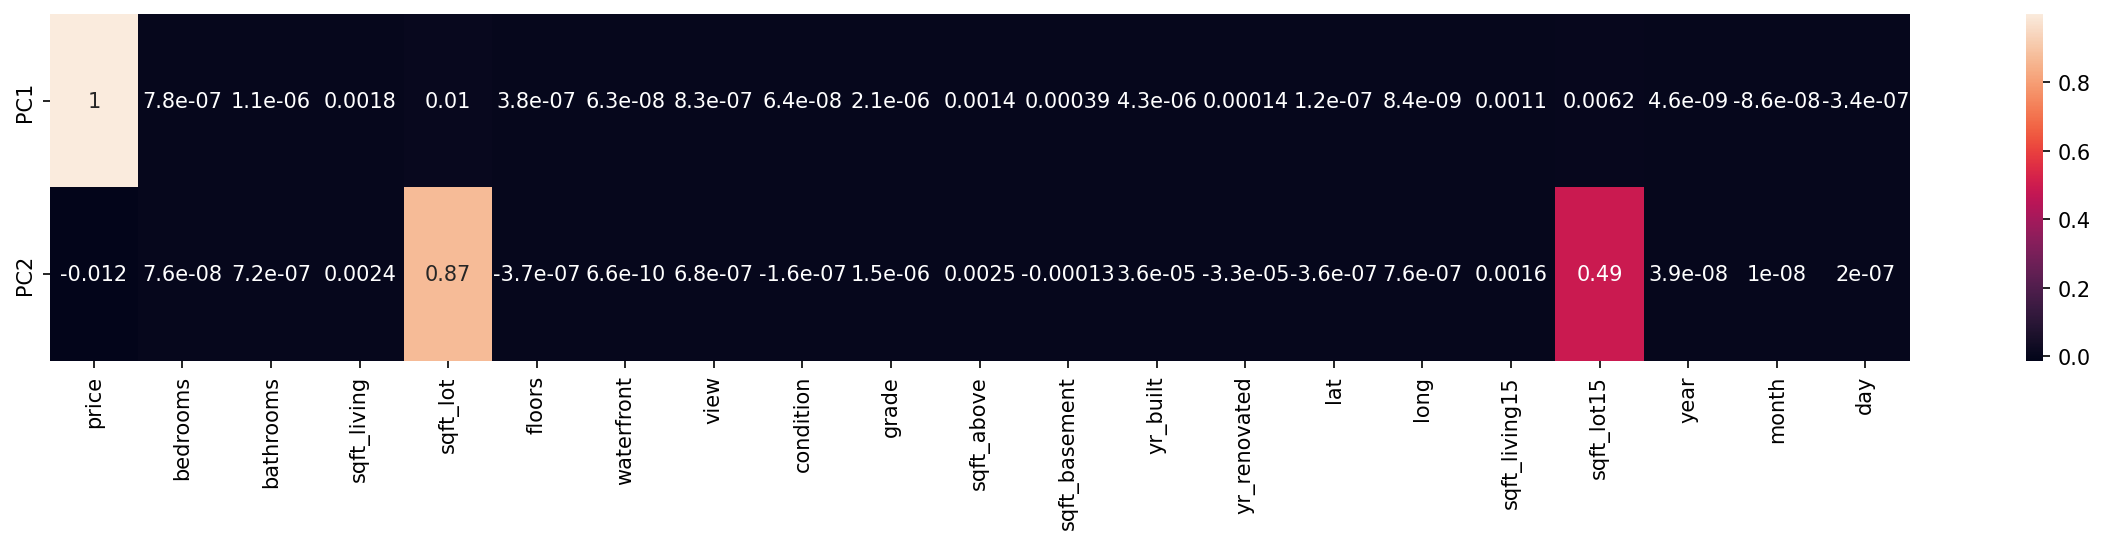

In [472]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,annot=True)

In [473]:
pca.explained_variance_ratio_

array([0.98219608, 0.01572275])

In [474]:
np.sum(pca.explained_variance_ratio_)

0.9979188263397047

In [475]:
pca_30 = PCA(n_components=len(D.columns))
pca_30.fit(D)

PCA(n_components=21)

In [476]:
pca_30.explained_variance_ratio_

array([9.82196076e-01, 1.57227503e-02, 2.07047879e-03, 6.47977351e-06,
       1.92092187e-06, 1.21657285e-06, 1.07252336e-06, 4.44611183e-09,
       5.43316654e-10, 7.13025293e-11, 4.24675355e-12, 3.33995760e-12,
       2.88357239e-12, 2.53369131e-12, 1.55884761e-12, 9.19101132e-13,
       5.99734595e-13, 1.10860622e-13, 9.55220392e-14, 4.27608907e-14,
       1.08818435e-36])

In [477]:
np.sum(pca_30.explained_variance_ratio_)

1.0000000000000002

In [478]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:]

array([98.22, 99.79])

In [479]:
explained_variance = []

for n in range(1,len(D.columns)):
    pca = PCA(n_components=n)
    pca.fit(D)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

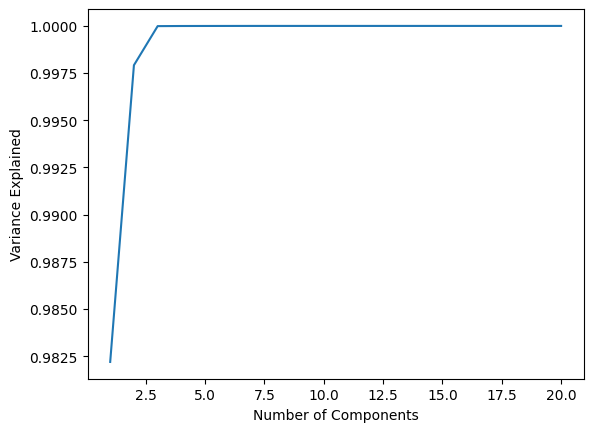

In [480]:
plt.plot(range(1,len(D.columns)), explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

### Linear Reg after PCA and reducing dimentions

In [481]:
X = D.drop('price' ,axis=1)
y = D['price']

In [482]:
pca = PCA(n_components=2)

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [484]:
X_red_train = pca.fit_transform(X_train)
X_red_test = pca.transform(X_test)
LinearRegression = LinearRegression()
pca = LinearRegression.fit(X_red_train, y_train)
y_pred = pca.predict(X_red_test)

#### PCA Linear Reg: Test Metrics

In [485]:
PCA_MAE_test = mean_absolute_error(y_test,y_pred)
PCA_MSE_test = mean_squared_error(y_test,y_pred)
PCA_RMSE_test = np.sqrt(PCA_MSE_test)

In [486]:
D['price'].std()/PCA_RMSE_test

0.9701267697259802

In [487]:
PCA_MAE_test

236444.82384055806

In [488]:
PCA_MSE_test

143210921209.31332

In [489]:
PCA_RMSE_test

378432.1883895625

In [490]:
PCA_r2_test = r2_score(y_test,y_pred)

In [491]:
PCA_r2_test

0.008004697307449238

#### PCA Linear Reg: Train Metrics

In [492]:
y_pred = pca.predict(X_red_train)

In [493]:
PCA_MAE_train = mean_absolute_error(y_train,y_pred)
PCA_MSE_train = mean_squared_error(y_train,y_pred)
PCA_RMSE_train = np.sqrt(PCA_MSE_train)

In [494]:
D['price'].std()/PCA_RMSE_train

1.020164966838248

In [495]:
PCA_MAE_train

230131.5590976148

In [496]:
PCA_MSE_train

129506720176.81494

In [497]:
PCA_RMSE_train

359870.4213697132

In [498]:
PCA_r2_train = r2_score(y_train,y_pred)

In [499]:
PCA_r2_train

0.008719674107709574

### Comparing All Models Metrics

In [500]:
models = ['Linear', 'LinearAll', 'Ridge', 'RidgeCV', 'Lasso', 'Elastic', 'Poly', 'PCA(lr)']
r_sq = [ Linear_r2_train, LinearAll_r2_train, Ridge_r2_train, RidgeCV_r2_train, Lasso_r2_train, Elastic_r2_train, polynomial_r2_train, PCA_r2_train]
RMSE_arr = [ Linear_RMSE_train, LinearAll_RMSE_train, Ridge_RMSE_train, RidgeCV_RMSE_train, Lasso_RMSE_train, Elastic_RMSE_train, polynomial_RMSE_train, PCA_RMSE_train]
compare_table = pd.DataFrame({'Model':models, 'r^2':r_sq, 'RMSE':RMSE_arr})
compare_table

Model       r^2           RMSE
0     Linear  0.509933  172203.299222
1  LinearAll  0.693101  201591.631464
2      Ridge  0.536688  167436.645672
3    RidgeCV  0.541102  166637.168424
4      Lasso  0.499780  173978.014832
5    Elastic  0.533177  168069.935524
6       Poly  0.533177  168069.935524
7    PCA(lr)  0.008720  359870.421370

In [501]:
from operator import truediv
res = list(map(truediv, r_sq, RMSE_arr))

In [502]:
compare_table = pd.DataFrame({'Model':models, 'r^2':r_sq, 'RMSE':RMSE_arr, 'result':res})
compare_table.sort_values(by='result', axis=0, ascending=False)

Model       r^2           RMSE        result
1  LinearAll  0.693101  201591.631464  3.438144e-06
3    RidgeCV  0.541102  166637.168424  3.247186e-06
2      Ridge  0.536688  167436.645672  3.205320e-06
5    Elastic  0.533177  168069.935524  3.172350e-06
6       Poly  0.533177  168069.935524  3.172350e-06
0     Linear  0.509933  172203.299222  2.961226e-06
4      Lasso  0.499780  173978.014832  2.872660e-06
7    PCA(lr)  0.008720  359870.421370  2.423004e-08

## conclusion

#### According to the errors and R2 obtained in the above models and according to the above diagram, the best of the best model is Linear Regression for All data with outliers and the worst of the worst model is Lasso. but after PCA calculation, the "Linear" model was tested, which strangely had a very bad performance! There may have been a mistake and more studies are needed for this issue.<br><br>The difference of standard deviation and errors as well as the accuracy of each model was tested separately and this result is just presented according to all the statistics and figures calculated above.

<br>

## Second Phase

#### In this phase, questions are asked to the user and suitable houses are shown to him/her according to the answers and his/her need to find a house.

In [503]:
df.head(3)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0           0     0          3  ...              0      1955             0   
1           0     0          3  ...            400      1951          1991   
2           0     0          3  ...              0      1933             0   

       lat     long  sqft_living15  sqft_lot15  year  month  day  
0  47.5112 -122.257           1340        5650  2014     10   13  
1  47.7210 -122.319           1690        7639  2014     12    9  
2  47.7379 -122.233           2720        8062  2015      2   25  

[3 rows x 22 columns]

In [504]:
def checknull(tempDf):
    if tempDf.empty:
        print('Sorry! There is no such house!')
        return dFilter
    else:
        return tempDf

In [509]:
maxPrice = float(input(print("What is your maximum budget to buy a house?")))

What is your maximum budget to buy a house?
None5000000


In [510]:
dFilter = checknull(df[(df['price'] < maxPrice)])

In [511]:
sqftLiving = float(input(print("How many meters would you like your house to be?")))

How many meters would you like your house to be?
None1200


In [512]:
dFilter = checknull(dFilter[((sqftLiving-100 < dFilter['sqft_living']) & (dFilter['sqft_living'] < sqftLiving+100))])

In [513]:
bedrooms = float(input(print("How many rooms does it have?")))

How many rooms does it have?
None3


In [514]:
dFilter = checknull(dFilter[(dFilter['bedrooms'] == bedrooms)])

In [515]:
floors = float(input(print("How many floors do you want?")))

How many floors do you want?
None2


In [516]:
dFilter = checknull(dFilter[(dFilter['floors'] == floors)])

In [517]:
isGradeImportant = str(input(print("Is the grade that people give home important to you?")))

Is the grade that people give home important to you?
NoneYes


In [518]:
if isGradeImportant.lower().find('yes') == 0:
    minGrade = float(input(print("What is the minimum grade you want?")))
    dFilter = checknull(dFilter[((dFilter['grade'] == minGrade) | (dFilter['grade'] > minGrade))])

What is the minimum grade you want?
None8


In [519]:
sqftAbove = float(input(print("You didn't say the size of the upper floor! What size would you like it to be?")))

You didn't say the size of the upper floor! What size would you like it to be?
None1000


In [520]:
dFilter = checknull(dFilter[((sqftAbove-50 < dFilter['sqft_above']) & (dFilter['sqft_above'] < sqftAbove+50))])

In [521]:
isImportantYear = str(input(print("Do you have a problem even though your house is from 2010?")))

Do you have a problem even though your house is from 2010?
NoneYEs!! its important! i want new houses!


In [522]:
if isImportantYear.lower().find('yes') == 0:
    dFilter = checknull(dFilter[((2010 < dFilter['yr_built']) | (2010 == dFilter['yr_built']))])

In [523]:
dFilter

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15193 2014-05-13  450000.0         3       2.75         1250       892   
20952 2014-11-03  549900.0         3       2.00         1280       960   

       floors  waterfront  view  condition  ...  sqft_basement  yr_built  \
15193     2.0           0     0          3  ...            210      2010   
20952     2.0           0     0          3  ...            240      2014   

       yr_renovated      lat     long  sqft_living15  sqft_lot15  year  month  \
15193             0  47.5826 -122.387           1250        1296  2014      5   
20952             0  47.6020 -122.311           1280        1173  2014     11   

       day  
15193   13  
20952    3  

[2 rows x 22 columns]

<AxesSubplot: xlabel='long', ylabel='lat'>

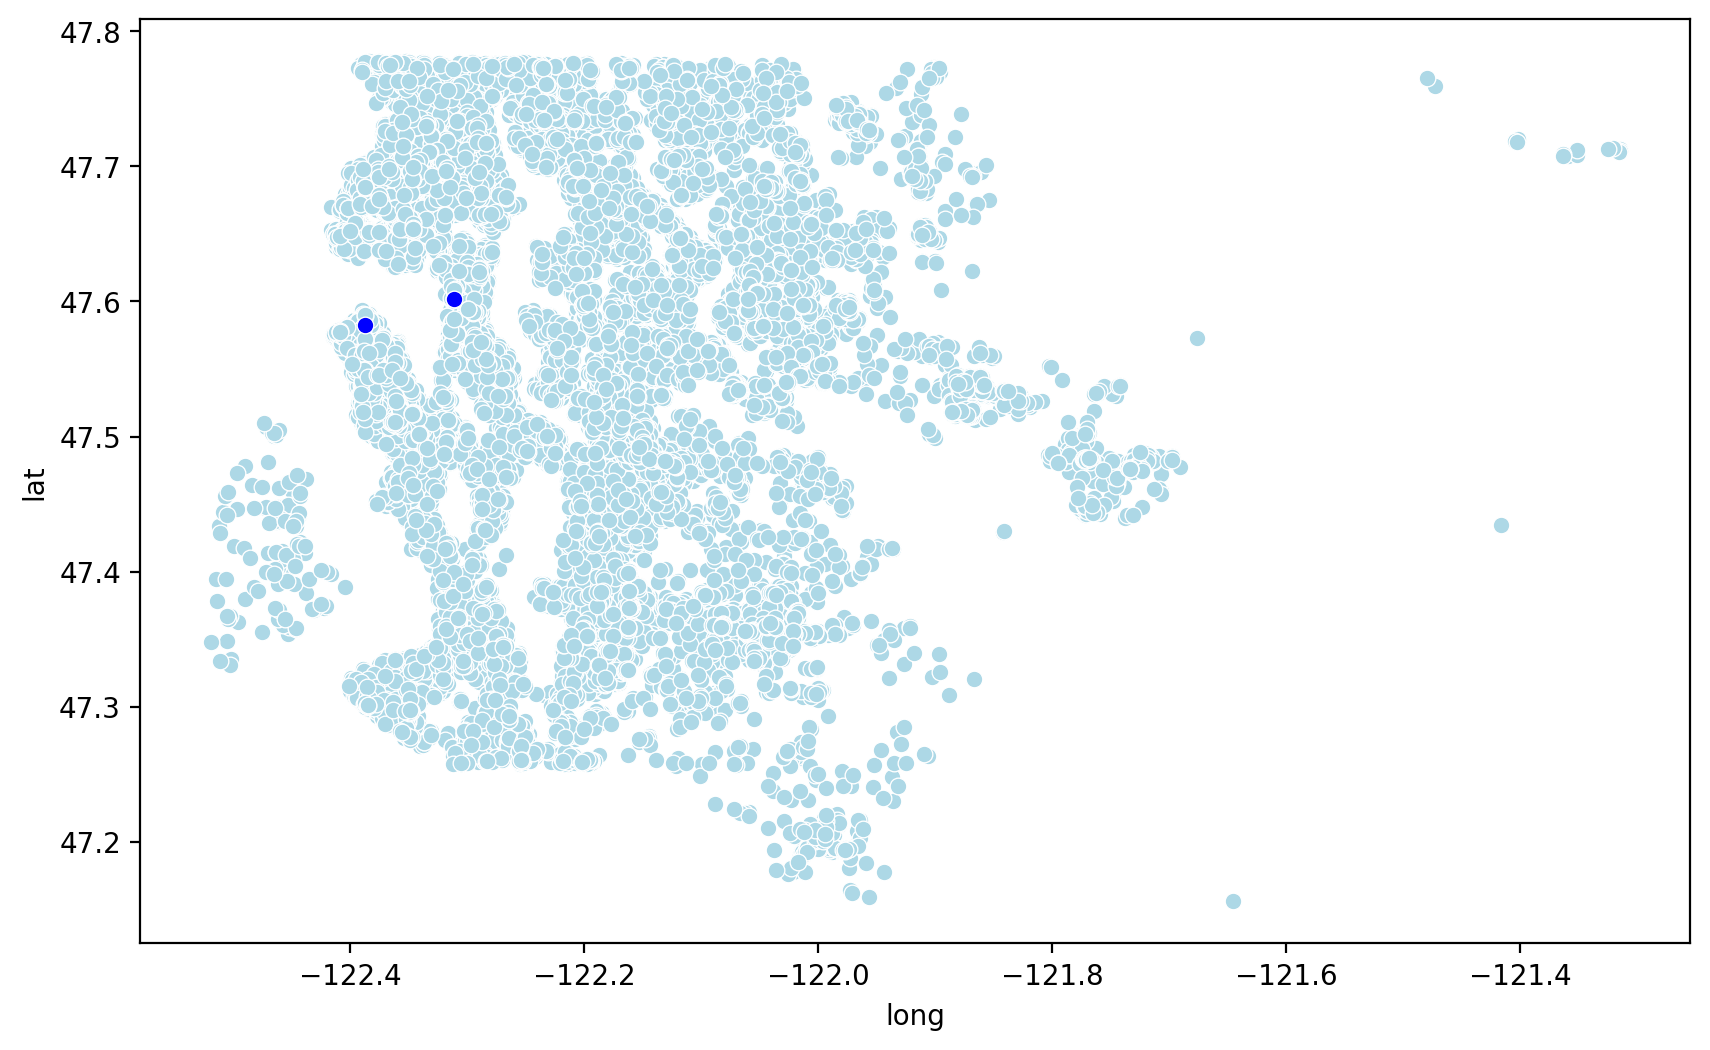

In [524]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, x='long',y='lat', color='lightblue')
sns.scatterplot(data=dFilter, x='long',y='lat', color='blue')